1er punto e-greedy

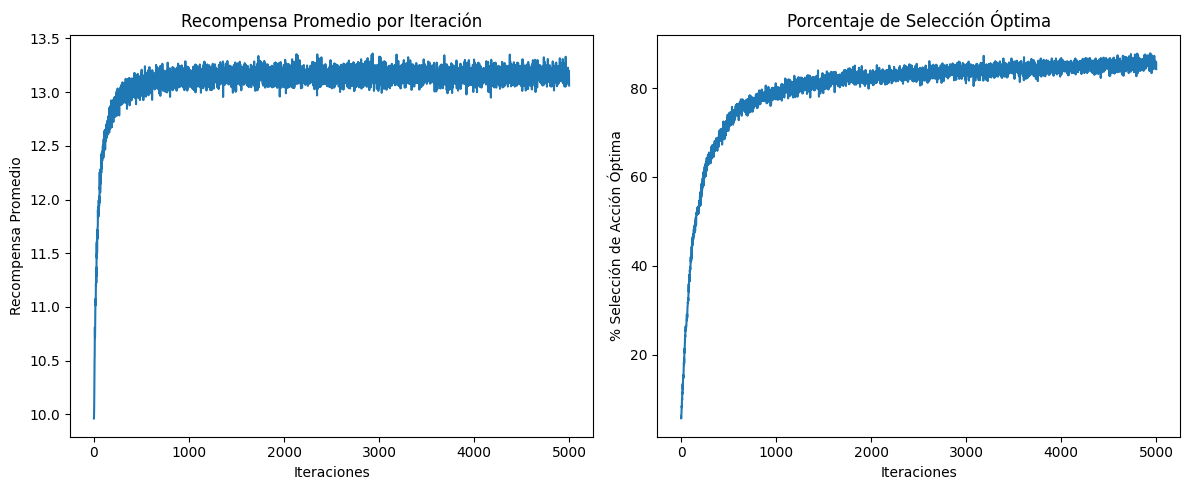

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Inicialización del banco de pruebas
def inicializar_Testbed(num_brazos):
    """Genera el banco de pruebas con valores verdaderos q_*(a)."""
    return np.random.normal(10, 2, num_brazos)  # Media 10, varianza 4 (2 por ser varianza estandar)

# Algoritmo epsilon-greedy ajustado
def inicializar_epsilon_greedy(num_brazos, epsilon):
    """Inicializa los parámetros del algoritmo epsilon-greedy."""
    return {
        "num_brazos": num_brazos,
        "epsilon": epsilon,
        "conteos": np.zeros(num_brazos),
        "valores": np.zeros(num_brazos),
    }

def seleccionar_brazo(agente):
    """Selecciona un brazo basado en la política epsilon-greedy."""
    if np.random.rand() < agente["epsilon"]:
        return np.random.randint(0, agente["num_brazos"])  # Exploración
    else:
        return np.argmax(agente["valores"])  # Explotación

def actualizar_agente(agente, brazo_seleccionado, recompensa):
    """Actualiza los valores estimados y los conteos del brazo seleccionado."""
    agente["conteos"][brazo_seleccionado] += 1
    n = agente["conteos"][brazo_seleccionado]
    valor = agente["valores"][brazo_seleccionado]
    agente["valores"][brazo_seleccionado] = ((n - 1) / n) * valor + (1 / n) * recompensa

# Experimento
def ejecutar_experimento(num_brazos, epsilon, iteraciones, repeticiones):
    recompensas_por_repeticion = np.zeros(iteraciones)
    accion_optima_por_repeticion = np.zeros(iteraciones)

    for _ in range(repeticiones):
        q_estrella = inicializar_Testbed(num_brazos)
        accion_optima = np.argmax(q_estrella)
        agente = inicializar_epsilon_greedy(num_brazos, epsilon)

        recompensas = np.zeros(iteraciones)
        conteo_accion_optima = np.zeros(iteraciones)
               
        for t in range(iteraciones):
            brazo = seleccionar_brazo(agente)
            recompensa = np.random.normal(q_estrella[brazo], np.sqrt(2))  # Varianza de las recompensas: 2
            actualizar_agente(agente, brazo, recompensa)

            recompensas[t] = recompensa
            if brazo == accion_optima:
                conteo_accion_optima[t] = 1

        recompensas_por_repeticion += recompensas
        accion_optima_por_repeticion += conteo_accion_optima

    recompensas_por_repeticion /= repeticiones
    accion_optima_por_repeticion /= repeticiones
    return recompensas_por_repeticion, accion_optima_por_repeticion

# Parámetros
num_brazos = 15
epsilon = 0.1
iteraciones = 5000
repeticiones = 1000

# Ejecución
recompensas, porcentaje_accion_optima = ejecutar_experimento(num_brazos, epsilon, iteraciones, repeticiones)

# Gráficos
plt.figure(figsize=(12, 5))

# Recompensa promedio
plt.subplot(1, 2, 1)
plt.plot(recompensas)
plt.xlabel("Iteraciones")
plt.ylabel("Recompensa Promedio")
plt.title("Recompensa Promedio por Iteración")

# Selección óptima
plt.subplot(1, 2, 2)
plt.plot(porcentaje_accion_optima * 100)
plt.xlabel("Iteraciones")
plt.ylabel("% Selección de Acción Óptima")
plt.title("Porcentaje de Selección Óptima")

plt.tight_layout()
plt.show()
